# Binary Search
- In a sorted array searching an element by reducing the space of search by half for every iteration of search
- T-O(logn) where n = no.of.elements

## Search Array

In [ ]:
'''
https://leetcode.com/problems/binary-search/
https://www.youtube.com/watch?v=s4DPM8ct1pI&t=423s
this is iterative approach where T - O(logn), S - O(1) as we use only 2 points and not any extra space
'''
class Solution:
    def search(self, nums: List[int], target: int) -> int:
        l, r = 0, len(nums) - 1         # initializing left & right pointers

        while l <= r:                   # loops only when l<=r
            m = l + ((r-l) // 2)        # find the mid without overflowing using (r-l)//2
            if nums[m] > target:        # if mid val > target 
                r = m - 1               # then remove right space by taking r pointer to m-1
            elif nums[m] < target:      # if mid value < target
                l = m + 1               # remove right space by taking l pointer to m+1
            else:
                return m                # if not both then m is the value
        return -1                 # they they are not value is not present in array then return -1


'''
Recursive Approach
T - O(logn), Space - O(logn) as we use space to store recursive values
'''
class Solution:
    def binary_search(self, l: int, r: int, nums: List[int], target: int) -> int:
        if l > r:
            return -1
        m = l + (r - l) // 2
        
        if nums[m] == target:
            return m
        if nums[m] < target:
            return self.binary_search(m + 1, r, nums, target)
        return self.binary_search(l, m - 1, nums, target)

    def search(self, nums: List[int], target: int) -> int:
        return self.binary_search(0, len(nums) - 1, nums, target)

In [1]:
matrix = [[1,3,5,7],[10,11,16,20],[23,30,34,60]]
rows, cols = len(matrix), len(matrix[0])

print(rows)
print(cols)

3
4


In [ ]:
'''
https://leetcode.com/problems/search-a-2d-matrix/
https://www.youtube.com/watch?v=Ber2pi2C0j0
T - O(log m + log n) i.e., O(logmn) where m is for row search using binary search, n is for searching element using binary search
S - O(1), as we only use points & no extra space taken
'''
# T = O(m.n) if we search each element in the matrix
# T = O(mlogn) if we search m rows of matrix using binary search for each row

# But we choose to use Binary search on entire matrix which got this effecient way
class Solution:
    def searchMatrix(self, matrix: List[List[int]], target: int) -> bool:
        ROWS, COLS = len(matrix), len(matrix[0])        # taking rows, cols count

        top, bot = 0, ROWS - 1                      # top, bottom rows identification
        while top <= bot:                           # validating top,bot
            row = (top + bot) // 2                  # checking for middle row in the matrix rows
            if target > matrix[row][-1]:            # check target < that matrix middle row last element 
                top = row + 1                       # if s top row changes
            elif target < matrix[row][0]:           # check target < matrix middle row 1st element
                bot = row - 1                       # if s bot row changes
            else:
                break                               # else out of loop, till here we got to know which row to search

        if not (top <= bot):        
            return False
        row = (top + bot) // 2                      # we go to that specific row
        l, r = 0, COLS - 1                          # make the pointers for 1st & last element in that row
        while l <= r:
            m = (l+r) // 2                          # mid point in that row
            if target > matrix[row][m]:             # check target> that matrix row mid element then change l pointer
                l = m+1
            elif target < matrix[row][m]:           # if target < that matrix row mid element then change r pointer & loop
                r = m - 1
            else:
                return True                         # finally found then print true
        return False                                # if not found in rows or in that specific row then print false



# Brute force
# T - O(m * n)
# S - O(1)
class Solution:
    def searchMatrix(self, matrix: List[List[int]], target: int) -> bool:
        for r in range(len(matrix)):
            for c in range(len(matrix[0])):
                if matrix[r][c] == target:
                    return True
        return False

## Search Range

- here we don't have list to search across it for an element
- we just have high & low values from which we need to find the required element using a helping function as shown in below screenshot
- 10 is hardcoded in helper function. it is the target we need to find

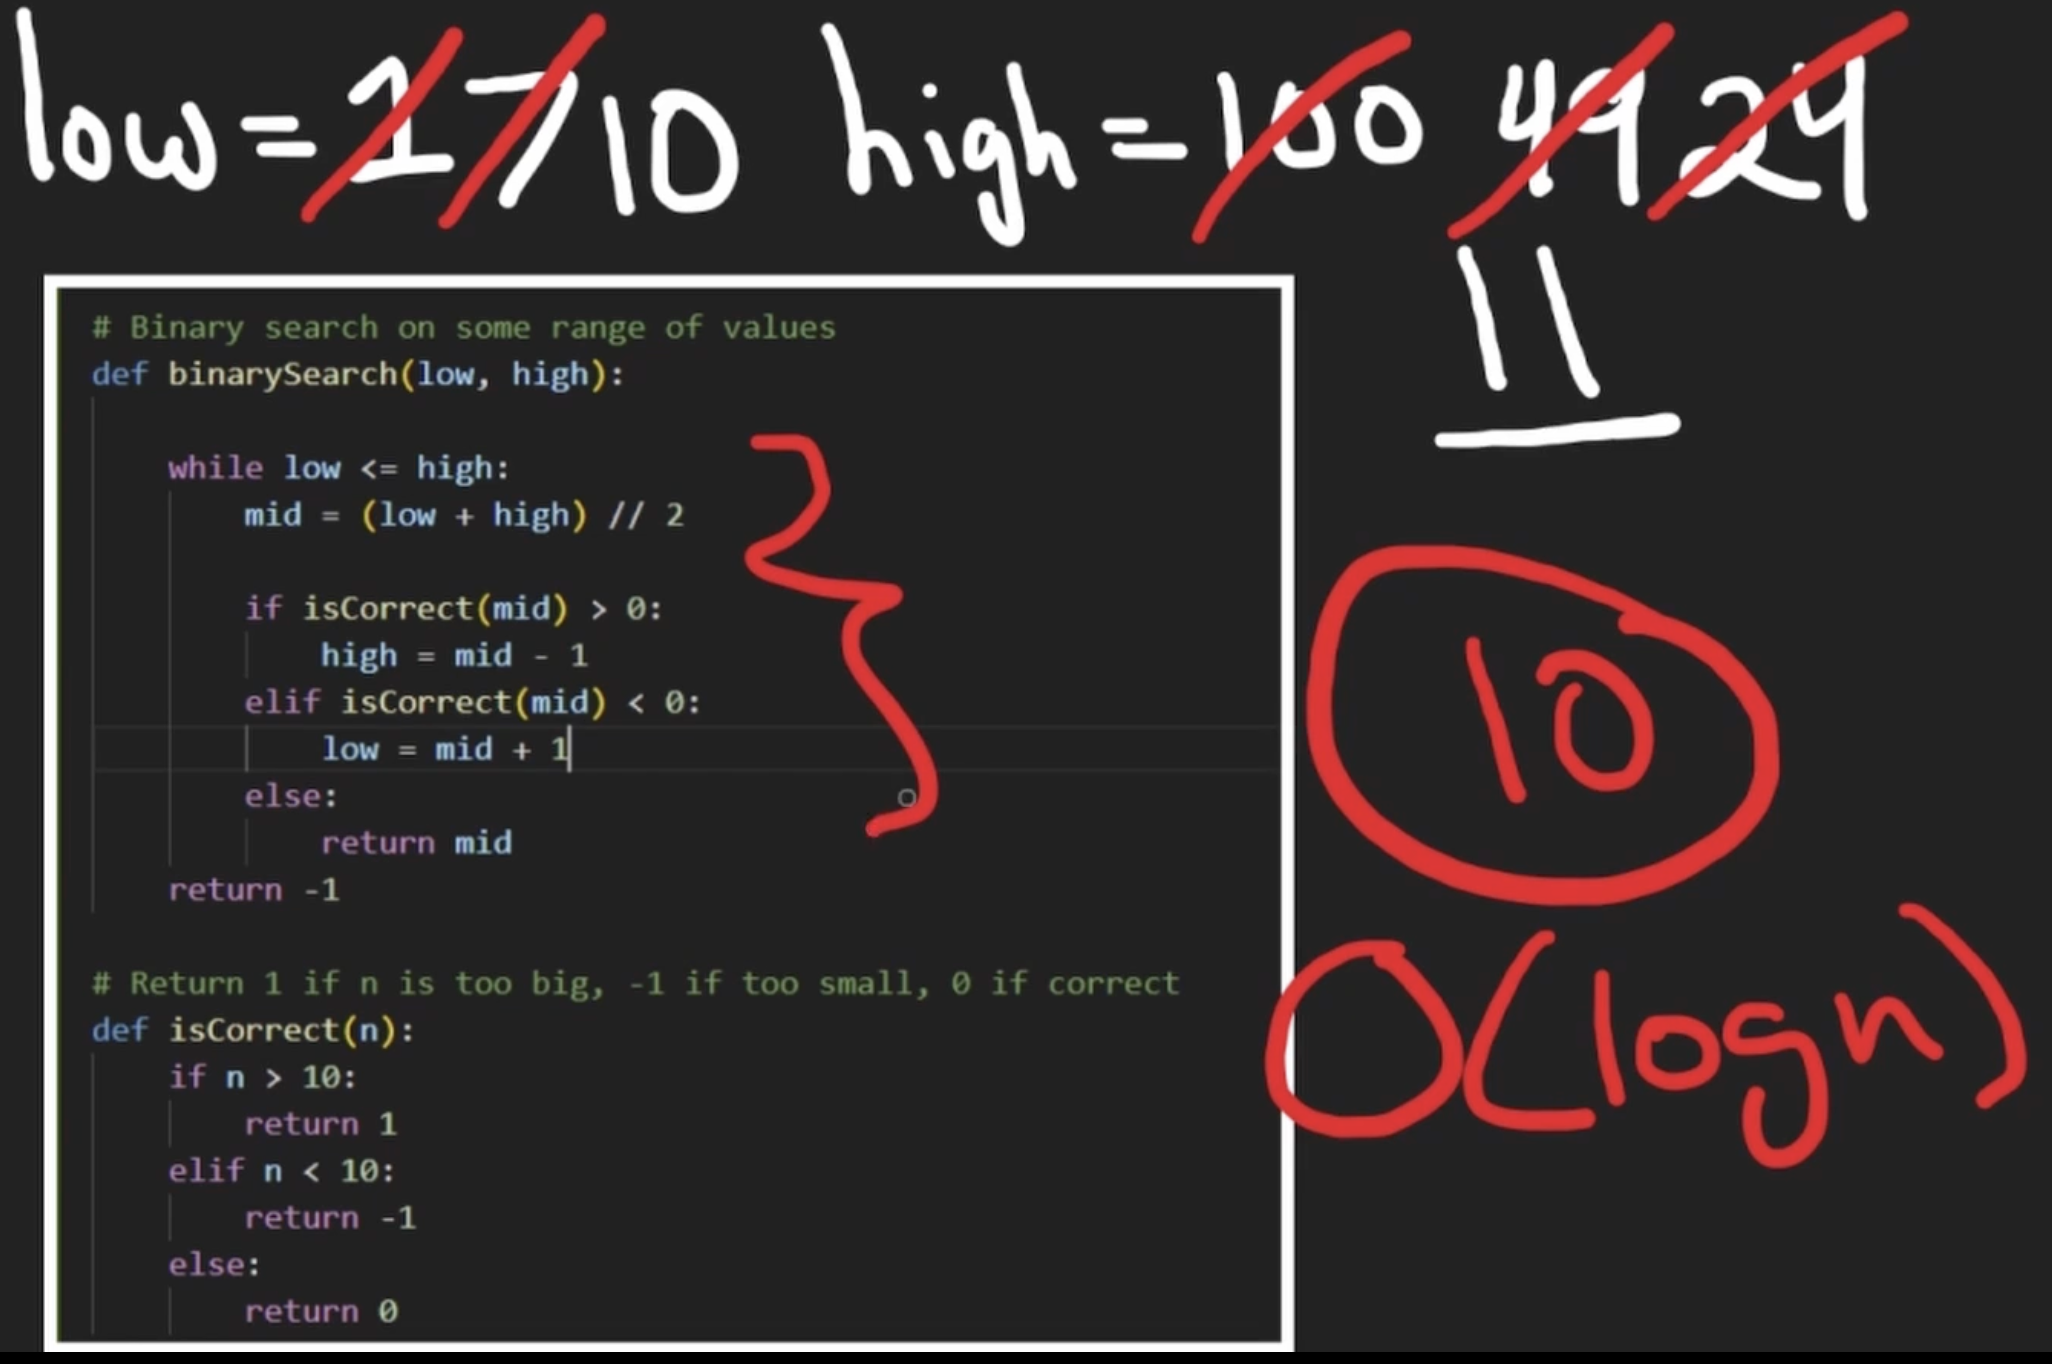

In [ ]:
'''
https://leetcode.com/problems/guess-number-higher-or-lower/submissions/1476787604/
https://www.youtube.com/watch?v=xW4QsTtaCa4&t=344s
T - O(logn) as we reduce half space each time , S - O(1) as no extra space used
'''
# The guess API is already defined for you.
# @param num, your guess
# @return -1 if num is higher than the picked number
#          1 if num is lower than the picked number
#          otherwise return 0
# def guess(num: int) -> int:

class Solution:
    def guessNumber(self, n: int) -> int:
        l, r = 1, n
        while True:
            m = (l+r) // 2
            res = guess(m)
            if res > 0:
                l = m + 1
            elif res < 0:
                r = m - 1
            else:
                return m



'''
https://leetcode.com/problems/first-bad-version/description/
T - O(logn) as we reduce half space each time , S - O(1) as no extra space used
'''
# The isBadVersion API is already defined for you.
# def isBadVersion(version: int) -> bool:

class Solution:
    def firstBadVersion(self, n: int) -> int:
        l,r = 1, n 

        while l<r:
            m = l + (r-l) // 2
            if isBadVersion(m):  # this gives boolean if true return r = m
                r = m            # cuz m is bad & m - 1 might be good. so we take m & calculate further
            else:
                l = m+1
        return l 





'''
https://www.youtube.com/watch?v=U2SozAs9RzA
https://leetcode.com/problems/koko-eating-bananas/description/
T - O(m.logn) = log n is for binary search over l-r range i.e.,log(max(p)) & m is for checking m piles in piles list
S - O(1) = no extra space taking apart from l,r pointers
we take l,r as pointers range and not passing as arguments so it is O(1)
'''
# Binary search optimal solution
class Solution:
    def minEatingSpeed(self, piles: List[int], h: int) -> int:
        l, r = 1, max(piles)                # taking l as min i.e.,1 & max one as r pointer
        res = r                             # r max cuz that can finish all the piles in count(piles) hrs

        while l <= r:                       # starting binary search
            k = l + (r-l) // 2              # taking k as mid value of l,r size
            hours = 0                       # initializing as 0
            for p in piles:                 
                hours += math.ceil(p / k)   # p/k will be hours to eat that pile with ceil it will take upper number & add to hours
            if hours <= h:                  # if it is < given h hrs
                res = min(res,k)            # taking min of initialized max pile r & now mid value k
                r = k - 1                   # reduce search space from l - r to l - (k-1)
            else:
                l = k + 1                   # else bring left pointer to k+1 index 
        return res                        # after calculation loop exits & we return latest res value which is min bananas need to eat to 
                                          # finish piles within h hrs



# Brute Force
# T - O(m*n) m,n = piles count, speed, S - O(1)
class Solution:
    def minEatingSpeed(self, piles: List[int], h: int) -> int:
        speed = 1      # we take each and every speed count from 1 till it reaches the required
        while True:
            totalTime = 0
            for pile in piles:
                totalTime += math.ceil(pile / speed)
            
            if totalTime <= h:
                return speed
            speed += 1
        return speed

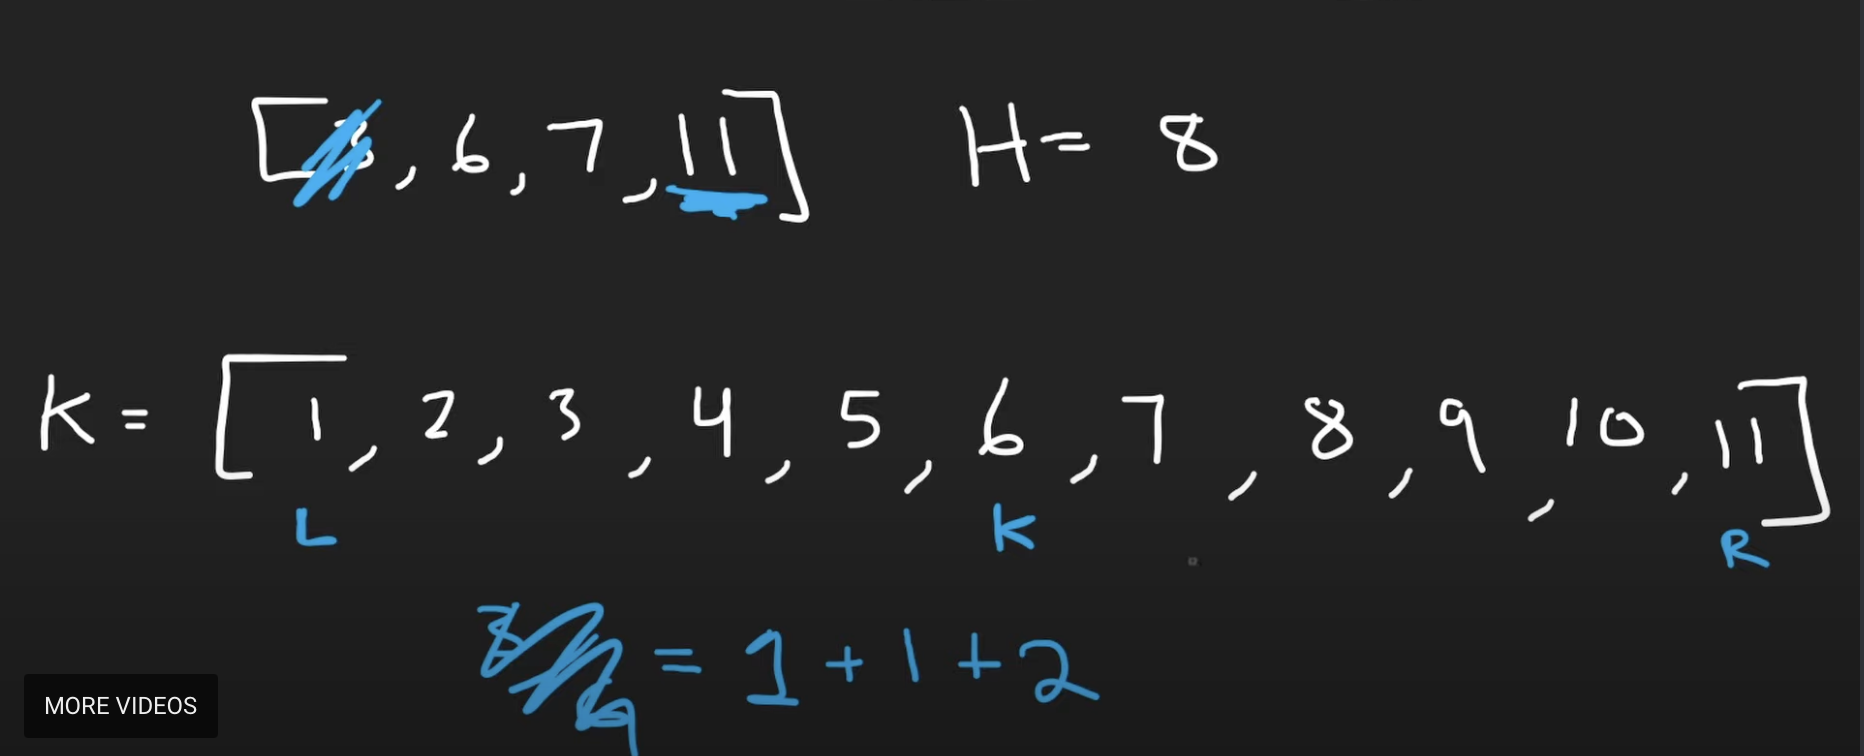